# Pandas for panel data 
## 1 Overview
## 2 Slicing and reshaping data

In [1]:
import pandas as pd
#set_option（para，value）函数
pd.set_option('display.max_columns', 6)  # 显示6列

#格式化浮点数，显示两位小数
pd.options.display.float_format = '{:,.2f}'.format

realwage = pd.read_csv('https://github.com/QuantEcon/QuantEcon.lectures.code/raw/master/pandas_panel/realwage.csv')

In [2]:
#realwage.tail()
realwage.head()

,Unnamed: 0,Time,Country,Series,Pay period,value
0,0,2006-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,"17,132.44"
1,1,2007-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,"18,100.92"
2,2,2008-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,"17,747.41"
3,3,2009-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,"18,580.14"
4,4,2010-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,"18,755.83"


In [3]:
realwage = realwage.pivot_table(values='value',
                                index='Time',
                                columns=['Country', 'Series', 'Pay period'])
realwage.head()

Country                                   Australia         \
Series     In 2015 constant prices at 2015 USD PPPs          
Pay period                                   Annual Hourly   
Time                                                         
2006-01-01                                20,410.65  10.33   
2007-01-01                                21,087.57  10.67   
2008-01-01                                20,718.24  10.48   
2009-01-01                                20,984.77  10.62   
2010-01-01                                20,879.33  10.57   

Country                                                        ...    \
Series     In 2015 constant prices at 2015 USD exchange rates  ...     
Pay period                                             Annual  ...     
Time                                                           ...     
2006-01-01                                          23,826.64  ...     
2007-01-01                                          24,616.84  ...     
2008-01-01                                          24,185.70  ...     
2009-01-01                                          24,496.84  ...     
2010-01-01                                          24,373.76  ...     

Country                               United States  \
Series     In 2015 constant prices at 2015 USD PPPs   
Pay period                                   Hourly   
Time                                                  
2006-01-01                                     6.05   
2007-01-01                                     6.24   
2008-01-01                                     6.78   
2009-01-01                                     7.58   
2010-01-01                                     7.88   

Country                                                               
Series     In 2015 constant prices at 2015 USD exchange rates         
Pay period                                             Annual Hourly  
Time                                                                  
2006-01-01                                          12,594.40   6.05  
2007-01-01                                          12,974.40   6.24  
2008-01-01                                          14,097.56   6.78  
2009-01-01                                          15,756.42   7.58  
2010-01-01                                          16,391.31   7.88  

[5 rows x 128 columns]

In [4]:
#to_datetime函数处理日期格式
realwage.index=pd.to_datetime(realwage.index)
type(realwage.index)

pandas.tseries.index.DatetimeIndex

In [5]:
type(realwage.columns)

pandas.indexes.multi.MultiIndex

In [6]:
realwage.columns.names

FrozenList(['Country', 'Series', 'Pay period'])

In [7]:
#选取美国的数据
realwage['United States'].head()

Series     In 2015 constant prices at 2015 USD PPPs         \
Pay period                                   Annual Hourly   
Time                                                         
2006-01-01                                12,594.40   6.05   
2007-01-01                                12,974.40   6.24   
2008-01-01                                14,097.56   6.78   
2009-01-01                                15,756.42   7.58   
2010-01-01                                16,391.31   7.88   

Series     In 2015 constant prices at 2015 USD exchange rates         
Pay period                                             Annual Hourly  
Time                                                                  
2006-01-01                                          12,594.40   6.05  
2007-01-01                                          12,974.40   6.24  
2008-01-01                                          14,097.56   6.78  
2009-01-01                                          15,756.42   7.58  
2010-01-01                                          16,391.31   7.88

In [8]:
#.stack() 内层的行转换为列 .unstack()  内层的列转换成行   对行列进行变化
realwage.stack().head()

Country                                              Australia  \
Series                In 2015 constant prices at 2015 USD PPPs   
Time       Pay period                                            
2006-01-01 Annual                                    20,410.65   
           Hourly                                        10.33   
2007-01-01 Annual                                    21,087.57   
           Hourly                                        10.67   
2008-01-01 Annual                                    20,718.24   

Country                                                                   \
Series                In 2015 constant prices at 2015 USD exchange rates   
Time       Pay period                                                      
2006-01-01 Annual                                              23,826.64   
           Hourly                                                  12.06   
2007-01-01 Annual                                              24,616.84   
           Hourly                                                  12.46   
2008-01-01 Annual                                              24,185.70   

Country                                                Belgium  \
Series                In 2015 constant prices at 2015 USD PPPs   
Time       Pay period                                            
2006-01-01 Annual                                    21,042.28   
           Hourly                                        10.09   
2007-01-01 Annual                                    21,310.05   
           Hourly                                        10.22   
2008-01-01 Annual                                    21,416.96   

Country                                      ...                          \
Series                                       ...                           
Time       Pay period                        ...                           
2006-01-01 Annual                            ...                           
           Hourly                            ...                           
2007-01-01 Annual                            ...                           
           Hourly                            ...                           
2008-01-01 Annual                            ...                           

Country                                                   United Kingdom  \
Series                In 2015 constant prices at 2015 USD exchange rates   
Time       Pay period                                                      
2006-01-01 Annual                                              20,376.32   
           Hourly                                                   9.81   
2007-01-01 Annual                                              20,954.13   
           Hourly                                                  10.07   
2008-01-01 Annual                                              20,902.87   

Country                                          United States  \
Series                In 2015 constant prices at 2015 USD PPPs   
Time       Pay period                                            
2006-01-01 Annual                                    12,594.40   
           Hourly                                         6.05   
2007-01-01 Annual                                    12,974.40   
           Hourly                                         6.24   
2008-01-01 Annual                                    14,097.56   

Country                                                                   
Series                In 2015 constant prices at 2015 USD exchange rates  
Time       Pay period                                                     
2006-01-01 Annual                                              12,594.40  
           Hourly                                                   6.05  
2007-01-01 Annual                                              12,974.40  
           Hourly                                                   6.24  
2008-01-01 Annual                                            

In [9]:
#指定stack的层级
realwage.stack(level='Country').head()

Series               In 2015 constant prices at 2015 USD PPPs         \
Pay period                                             Annual Hourly   
Time       Country                                                     
2006-01-01 Australia                                20,410.65  10.33   
           Belgium                                  21,042.28  10.09   
           Brazil                                    3,310.51   1.41   
           Canada                                   13,649.69   6.56   
           Chile                                     5,201.65   2.22   

Series               In 2015 constant prices at 2015 USD exchange rates         
Pay period                                                       Annual Hourly  
Time       Country                                                              
2006-01-01 Australia                                          23,826.64  12.06  
           Belgium                                            20,228.74   9.70  
           Brazil                                              2,032.87   0.87  
           Canada                                             14,335.12   6.89  
           Chile                                               3,333.76   1.42

In [10]:
realwage['2015'].stack(level=(1,2)).head()       # 第2和第3层转为行

Country                                                                   Australia  \
Time       Series                                             Pay period              
2015-01-01 In 2015 constant prices at 2015 USD PPPs           Annual      21,715.53   
                                                              Hourly          10.99   
           In 2015 constant prices at 2015 USD exchange rates Annual      25,349.90   
                                                              Hourly          12.83   

Country                                                                    Belgium  \
Time       Series                                             Pay period             
2015-01-01 In 2015 constant prices at 2015 USD PPPs           Annual     21,588.12   
                                                              Hourly         10.35   
           In 2015 constant prices at 2015 USD exchange rates Annual     20,753.48   
                                                              Hourly          9.95   

Country                                                                    Brazil  \
Time       Series                                             Pay period            
2015-01-01 In 2015 constant prices at 2015 USD PPPs           Annual     4,628.63   
                                                              Hourly         2.00   
           In 2015 constant prices at 2015 USD exchange rates Annual     2,842.28   
                                                              Hourly         1.21   

Country                                                                       ...        \
Time       Series                                             Pay period      ...         
2015-01-01 In 2015 constant prices at 2015 USD PPPs           Annual          ...         
                                                              Hourly          ...         
           In 2015 constant prices at 2015 USD exchange rates Annual          ...         
                                                              Hourly          ...         

Country                                                                     Turkey  \
Time       Series                                             Pay period             
2015-01-01 In 2015 constant prices at 2015 USD PPPs           Annual     10,062.42   
                                                              Hourly          4.82   
           In 2015 constant prices at 2015 USD exchange rates Annual      5,618.36   
                                                              Hourly          2.69   

Country                                                                   United Kingdom  \
Time       Series                                             Pay period                   
2015-01-01 In 2015 constant prices at 2015 USD PPPs           Annual           17,125.45   
                                                              Hourly                8.23   
           In 2015 constant prices at 2015 USD exchange rates Annual           20,814.46   
                                                              Hourly               10.01   

Country                                                                   United States  
Time       Series                                             Pay period                 
2015-01-01 In 2015 constant prices at 2015 USD PPPs           Annual          15,080.00  
                                                              Hourly               7.25  
           In 2015 constant prices at 2015 USD exchange rates Annual          15,080.00  
                                                              Hourly               7.25  

[4 rows x 32 columns]

In [11]:
#选择一年，一个特定的层级，transpose转置
realwage['2015'].stack(level=(1,2)).transpose().head()  # 第2、3层转为行、转置

Time                                     2015-01-01         \
Series     In 2015 constant prices at 2015 USD PPPs          
Pay period                                   Annual Hourly   
Country                                                      
Australia                                 21,715.53  10.99   
Belgium                                   21,588.12  10.35   
Brazil                                     4,628.63   2.00   
Canada                                    16,536.83   7.95   
Chile                                      6,633.56   2.80   

Time                                                                  
Series     In 2015 constant prices at 2015 USD exchange rates         
Pay period                                             Annual Hourly  
Country                                                               
Australia                                           25,349.90  12.83  
Belgium                                             20,753.48   9.95  
Brazil                                               2,842.28   1.21  
Canada                                              17,367.24   8.35  
Chile                                                4,251.49   1.81

In [12]:
#用2015汇率测算的，不同国家在不同年份每小时最低工资，xs.根据标签选取行或者列
realwage_f = realwage.xs(('Hourly', 'In 2015 constant prices at 2015 USD exchange rates'),
                         level=('Pay period', 'Series'), axis=1)
realwage_f.head()

Country,Australia,Belgium,Brazil,...,Turkey,United Kingdom,United States
Time,,,,,,,
2006-01-01,12.06,9.70,0.87,...,2.27,9.81,6.05
2007-01-01,12.46,9.82,0.92,...,2.26,10.07,6.24
2008-01-01,12.24,9.87,0.96,...,2.22,10.04,6.78
2009-01-01,12.40,10.21,1.03,...,2.28,10.15,7.58
2010-01-01,12.34,10.05,1.08,...,2.30,9.96,7.88


# 3 Merging dataframes and filling NaNs

In [13]:
worlddata = pd.read_csv('https://github.com/QuantEcon/QuantEcon.lectures.code/raw/master/pandas_panel/countries.csv', sep=';')
worlddata.head()

,Country (en),Country (de),Country (local),...,Deathrate,Life expectancy,Url
0,Afghanistan,Afghanistan,Afganistan/Afqanestan,...,13.70,51.30,https://www.laenderdaten.info/Asien/Afghanista...
1,Egypt,Ägypten,Misr,...,4.70,72.70,https://www.laenderdaten.info/Afrika/Aegypten/...
2,Åland Islands,Ålandinseln,Åland,...,0.00,0.00,https://www.laenderdaten.info/Europa/Aland/ind...
3,Albania,Albanien,Shqipëria,...,6.70,78.30,https://www.laenderdaten.info/Europa/Albanien/...
4,Algeria,Algerien,Al-Jaza’ir/Algérie,...,4.30,76.80,https://www.laenderdaten.info/Afrika/Algerien/...


In [14]:
#选取国家和所在大陆
worlddata=worlddata[['Country (en)','Continent']]
worlddata=worlddata.rename(columns={'Country (en)':'Country'})
worlddata.head()

,Country,Continent
0,Afghanistan,Asia
1,Egypt,Africa
2,Åland Islands,Europe
3,Albania,Europe
4,Algeria,Africa


In [15]:
#merge worlddata和realwage_f这两个dataframe,pandas默认的是行合并
realwage_f.transpose().head()


Time,2006-01-01 00:00:00,2007-01-01 00:00:00,2008-01-01 00:00:00,...,2014-01-01 00:00:00,2015-01-01 00:00:00,2016-01-01 00:00:00
Country,,,,,,,
Australia,12.06,12.46,12.24,...,12.67,12.83,12.98
Belgium,9.70,9.82,9.87,...,10.01,9.95,9.76
Brazil,0.87,0.92,0.96,...,1.21,1.21,1.24
Canada,6.89,6.96,7.24,...,8.22,8.35,8.48
Chile,1.42,1.45,1.44,...,1.76,1.81,1.91


In [16]:
#merge有四种形式，left join ,right join ,outer join,inner join，默认为inner join
merged = pd.merge(realwage_f.transpose(), worlddata,
                  how='left', left_index=True, right_on='Country')
merged.head()

,2006-01-01 00:00:00,2007-01-01 00:00:00,2008-01-01 00:00:00,...,2016-01-01 00:00:00,Country,Continent
17,12.06,12.46,12.24,...,12.98,Australia,Australia
23,9.70,9.82,9.87,...,9.76,Belgium,Europe
32,0.87,0.92,0.96,...,1.24,Brazil,South America
100,6.89,6.96,7.24,...,8.48,Canada,North America
38,1.42,1.45,1.44,...,1.91,Chile,South America


In [17]:
#判断是否有缺失值 .isnull()
merged[merged['Continent'].isnull()]

,2006-01-01 00:00:00,2007-01-01 00:00:00,2008-01-01 00:00:00,...,2016-01-01 00:00:00,Country,Continent
247,3.42,3.74,3.87,...,5.28,Korea,NaN
247,0.23,0.45,0.39,...,0.55,Russian Federation,NaN
247,1.50,1.64,1.71,...,2.08,Slovak Republic,NaN


In [18]:
#创建一个包含这些缺失国家和对应所在大陆的dictionary
missing_continents = {'Korea': 'Asia',
                      'Russian Federation': 'Europe',
                      'Slovak Republic': 'Europe'}

merged['Country'].map(missing_continents)

17        NaN
23        NaN
32        NaN
100       NaN
38        NaN
108       NaN
41        NaN
225       NaN
53        NaN
58        NaN
45        NaN
68        NaN
233       NaN
86        NaN
88        NaN
91        NaN
247      Asia
117       NaN
122       NaN
123       NaN
138       NaN
153       NaN
151       NaN
174       NaN
175       NaN
247    Europe
247    Europe
198       NaN
200       NaN
227       NaN
241       NaN
240       NaN
Name: Country, dtype: object

In [19]:
#.fillna()用来填补缺失值
merged['Continent'] = merged['Continent'].fillna(merged['Country'].map(missing_continents))

# Check for whether continents were correctly mapped

merged[merged['Country'] == 'Korea']

,2006-01-01 00:00:00,2007-01-01 00:00:00,2008-01-01 00:00:00,...,2016-01-01 00:00:00,Country,Continent
247,3.42,3.74,3.87,...,5.28,Korea,Asia


In [20]:
#将美洲国家汇总起来
replace = ['Central America', 'North America', 'South America']

for country in replace:
    merged['Continent'].replace(to_replace=country,
                                value='America',
                                inplace=True)

In [21]:
#.sort_index()
merged = merged.set_index(['Continent', 'Country']).sort_index()
merged.head()

2006-01-01  2007-01-01  2008-01-01     ...      \
Continent Country                                            ...       
America   Brazil            0.87        0.92        0.96     ...       
          Canada            6.89        6.96        7.24     ...       
          Chile             1.42        1.45        1.44     ...       
          Colombia          1.01        1.02        1.01     ...       
          Costa Rica         nan         nan         nan     ...       

                      2014-01-01  2015-01-01  2016-01-01  
Continent Country                                         
America   Brazil            1.21        1.21        1.24  
          Canada            8.22        8.35        8.48  
          Chile             1.76        1.81        1.91  
          Colombia          1.13        1.13        1.12  
          Costa Rica        2.41        2.56        2.63  

[5 rows x 11 columns]

In [22]:
merged.columns

Index([2006-01-01 00:00:00, 2007-01-01 00:00:00, 2008-01-01 00:00:00,
       2009-01-01 00:00:00, 2010-01-01 00:00:00, 2011-01-01 00:00:00,
       2012-01-01 00:00:00, 2013-01-01 00:00:00, 2014-01-01 00:00:00,
       2015-01-01 00:00:00, 2016-01-01 00:00:00],
      dtype='object')

In [23]:
#to_datetime()
merged.columns = pd.to_datetime(merged.columns)
merged.columns = merged.columns.rename('Time')
merged.columns

DatetimeIndex(['2006-01-01', '2007-01-01', '2008-01-01', '2009-01-01',
               '2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01',
               '2014-01-01', '2015-01-01', '2016-01-01'],
              dtype='datetime64[ns]', name='Time', freq=None)

In [24]:
merged = merged.transpose()
merged.head()

Continent  America                   ...         Europe                     
Country     Brazil Canada Chile      ...       Slovenia Spain United Kingdom
Time                                 ...                                    
2006-01-01    0.87   6.89  1.42      ...           3.92  3.99           9.81
2007-01-01    0.92   6.96  1.45      ...           3.88  4.10          10.07
2008-01-01    0.96   7.24  1.44      ...           3.96  4.14          10.04
2009-01-01    1.03   7.67  1.52      ...           4.08  4.32          10.15
2010-01-01    1.08   7.94  1.56      ...           4.81  4.30           9.96

[5 rows x 32 columns]

# 4 Grouping and summarizing data

In [25]:
#Groupby分组函数：mean()
merged.mean().head(10)

Continent  Country      
America    Brazil          1.09
           Canada          7.82
           Chile           1.62
           Colombia        1.07
           Costa Rica      2.53
           Mexico          0.53
           United States   7.15
Asia       Israel          5.95
           Japan           6.18
           Korea           4.22
dtype: float64

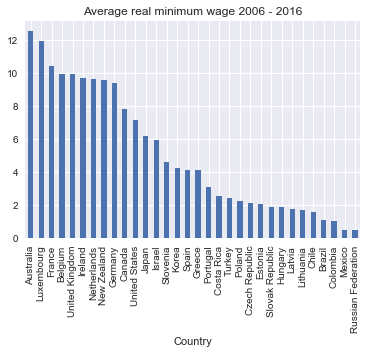

In [26]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('seaborn')
#内嵌绘图
%matplotlib inline

merged.mean().sort_values(ascending=False).plot(kind='bar', title="Average real minimum wage 2006 - 2016")

#Set country labels
country_labels = merged.mean().sort_values(ascending=False).index.get_level_values('Country').tolist()
plt.xticks(range(0, len(country_labels)), country_labels)
plt.xlabel('Country')

plt.show()

In [27]:
merged.mean(axis=1).head()

Time
2006-01-01   4.69
2007-01-01   4.84
2008-01-01   4.90
2009-01-01   5.08
2010-01-01   5.11
dtype: float64

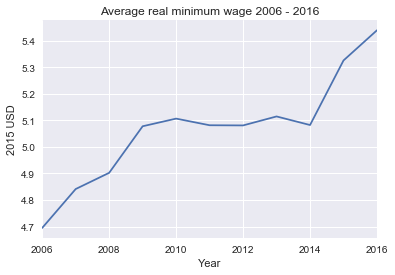

In [28]:
merged.mean(axis=1).plot()
plt.title('Average real minimum wage 2006 - 2016')
plt.ylabel('2015 USD')
plt.xlabel('Year')
plt.show()

In [29]:
merged.mean(level='Continent', axis=1).head()

Continent,America,Asia,Australia,Europe
Time,,,,
2006-01-01,2.80,4.29,10.25,4.80
2007-01-01,2.85,4.44,10.73,4.94
2008-01-01,2.99,4.45,10.76,4.99
2009-01-01,3.23,4.53,10.97,5.16
2010-01-01,3.34,4.53,10.95,5.17


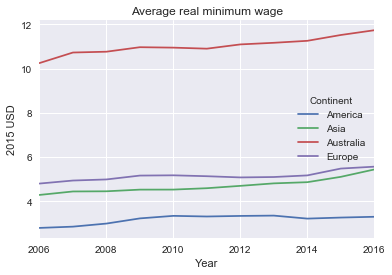

In [30]:
merged.mean(level='Continent', axis=1).plot()
plt.title('Average real minimum wage')
plt.ylabel('2015 USD')
plt.xlabel('Year')
plt.show()

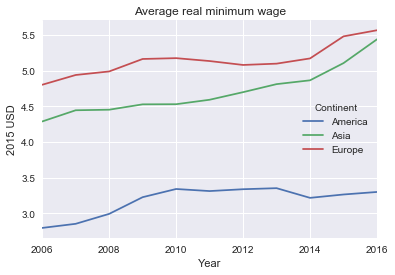

In [31]:
merged = merged.drop('Australia', level='Continent', axis=1)
merged.mean(level='Continent', axis=1).plot()
plt.title('Average real minimum wage')
plt.ylabel('2015 USD')
plt.xlabel('Year')
plt.show()

In [32]:
merged

Continent  America                   ...         Europe                     
Country     Brazil Canada Chile      ...       Slovenia Spain United Kingdom
Time                                 ...                                    
2006-01-01    0.87   6.89  1.42      ...           3.92  3.99           9.81
2007-01-01    0.92   6.96  1.45      ...           3.88  4.10          10.07
2008-01-01    0.96   7.24  1.44      ...           3.96  4.14          10.04
2009-01-01    1.03   7.67  1.52      ...           4.08  4.32          10.15
2010-01-01    1.08   7.94  1.56      ...           4.81  4.30           9.96
2011-01-01    1.09   7.97  1.59      ...           4.95  4.22           9.76
2012-01-01    1.18   8.12  1.63      ...           4.94  4.12           9.72
2013-01-01    1.21   8.17  1.72      ...           4.98  4.09           9.65
2014-01-01    1.21   8.22  1.76      ...           5.01  4.10           9.72
2015-01-01    1.21   8.35  1.81      ...           5.05  4.14          10.01
2016-01-01    1.24   8.48  1.91      ...           5.05  4.19          10.26

[11 rows x 30 columns]

In [33]:
merged.stack().head()

Continent            America  Asia  Europe
Time       Country                        
2006-01-01 Belgium       nan   nan    9.70
           Brazil       0.87   nan     nan
           Canada       6.89   nan     nan
           Chile        1.42   nan     nan
           Colombia     1.01   nan     nan

In [34]:
merged.stack().describe()

Continent,America,Asia,Europe
count,69.00,44.00,200.00
mean,3.19,4.70,5.15
std,3.02,1.56,3.82
min,0.52,2.22,0.23
25%,1.03,3.37,2.02
50%,1.44,5.48,3.54
75%,6.96,5.95,9.70
max,8.48,6.65,12.39


In [35]:
#group分组函数,生成一个groupby对象
grouped = merged.groupby(level='Continent', axis=1)
grouped

In [36]:
#.size()返回一个含有分组大小的Series
grouped.size()

Continent
America     7
Asia        4
Europe     19
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


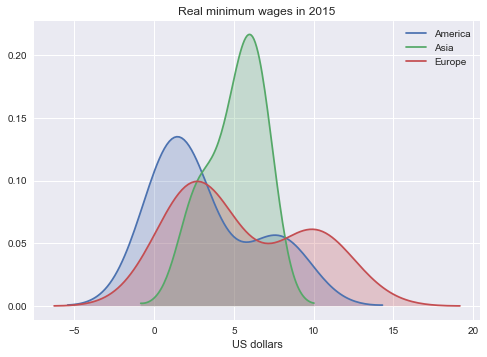

In [37]:
import seaborn as sns

continents = grouped.groups.keys()
#.kdeplot用于核密度估计，shade=True控制阴影
for continent in continents:
    sns.kdeplot(grouped.get_group(continent)['2015'].unstack(), label=continent, shade=True)

plt.title('Real minimum wages in 2015')
plt.xlabel('US dollars')
plt.show()

In [38]:
grouped

# Exercises

In [39]:
employ = pd.read_csv('https://github.com/QuantEcon/QuantEcon.lectures.code/raw/master/pandas_panel/employ.csv')
employ = employ.pivot_table(values='Value',
                            index=['DATE'],
                            columns=['UNIT','AGE', 'SEX', 'INDIC_EM', 'GEO'])
employ.index = pd.to_datetime(employ.index) # ensure that dates are datetime format
employ.head()

UNIT       Percentage of total population                       ...        \
AGE                   From 15 to 24 years                       ...         
SEX                               Females                       ...         
INDIC_EM                Active population                       ...         
GEO                               Austria Belgium Bulgaria      ...         
DATE                                                            ...         
2007-01-01                          56.00   31.60    26.00      ...         
2008-01-01                          56.20   30.80    26.10      ...         
2009-01-01                          56.20   29.90    24.80      ...         
2010-01-01                          54.00   29.80    26.60      ...         
2011-01-01                          54.80   29.80    24.80      ...         

UNIT                                           Thousand persons           \
AGE                                         From 55 to 64 years            
SEX                                                       Total            
INDIC_EM   Total employment (resident population concept - LFS)            
GEO                                                 Switzerland   Turkey   
DATE                                                                       
2007-01-01                                                nan   1,282.00   
2008-01-01                                                nan   1,354.00   
2009-01-01                                                nan   1,449.00   
2010-01-01                                             640.00   1,583.00   
2011-01-01                                             661.00   1,760.00   

UNIT                       
AGE                        
SEX                        
INDIC_EM                   
GEO        United Kingdom  
DATE                       
2007-01-01       4,131.00  
2008-01-01       4,204.00  
2009-01-01       4,193.00  
2010-01-01       4,186.00  
2011-01-01       4,164.00  

[5 rows x 1440 columns]

In [40]:
employ.columns.names

FrozenList(['UNIT', 'AGE', 'SEX', 'INDIC_EM', 'GEO'])

In [41]:
#.unique()函数去除其中重复的元素，并按元素由小到大返回一个无重复元素的元组或列表
for name in employ.columns.names:
    print(name, employ.columns.get_level_values(name).unique())

UNIT Index(['Percentage of total population', 'Thousand persons'], dtype='object', name='UNIT')
AGE Index(['From 15 to 24 years', 'From 25 to 54 years', 'From 55 to 64 years'], dtype='object', name='AGE')
SEX Index(['Females', 'Males', 'Total'], dtype='object', name='SEX')
INDIC_EM Index(['Active population', 'Total employment (resident population concept - LFS)'], dtype='object', name='INDIC_EM')
GEO Index(['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic',
       'Denmark', 'Estonia', 'Euro area (17 countries)',
       'Euro area (18 countries)', 'Euro area (19 countries)',
       'European Union (15 countries)', 'European Union (27 countries)',
       'European Union (28 countries)', 'Finland',
       'Former Yugoslav Republic of Macedonia, the', 'France',
       'France (metropolitan)',
       'Germany (until 1990 former territory of the FRG)', 'Greece', 'Hungary',
       'Iceland', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg',
       'Malta', 'Neth

In [42]:
#swaplevel调整索引级别，.sort_index()按行或者列排序
employ.columns = employ.columns.swaplevel(0,-1)
employ = employ.sort_index(axis=1)

In [43]:
#.tolist()矩阵转换成列表
geo_list = employ.columns.get_level_values('GEO').unique().tolist()
countries = [x for x in geo_list if not x.startswith('Euro')]
employ = employ[countries]
employ.columns.get_level_values('GEO').unique()

Index(['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic',
       'Denmark', 'Estonia', 'Finland',
       'Former Yugoslav Republic of Macedonia, the', 'France',
       'France (metropolitan)',
       'Germany (until 1990 former territory of the FRG)', 'Greece', 'Hungary',
       'Iceland', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg',
       'Malta', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania',
       'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey',
       'United Kingdom'],
      dtype='object', name='GEO')

In [44]:
employ_f = employ.xs(('Percentage of total population', 'Active population'),
                     level=('UNIT', 'INDIC_EM'),
                     axis=1)
employ_f.head()

GEO                    Austria              ...       United Kingdom        \
AGE        From 15 to 24 years              ...  From 55 to 64 years         
SEX                    Females Males Total  ...              Females Males   
DATE                                        ...                              
2007-01-01               56.00 62.90 59.40  ...                49.90 68.90   
2008-01-01               56.20 62.90 59.50  ...                50.20 69.80   
2009-01-01               56.20 62.90 59.50  ...                50.60 70.30   
2010-01-01               54.00 62.60 58.30  ...                51.10 69.20   
2011-01-01               54.80 63.60 59.20  ...                51.30 68.40   

GEO               
AGE               
SEX        Total  
DATE              
2007-01-01 59.30  
2008-01-01 59.80  
2009-01-01 60.30  
2010-01-01 60.00  
2011-01-01 59.70  

[5 rows x 306 columns]

In [45]:
employ_f = employ_f.drop('Total', level='SEX', axis=1)

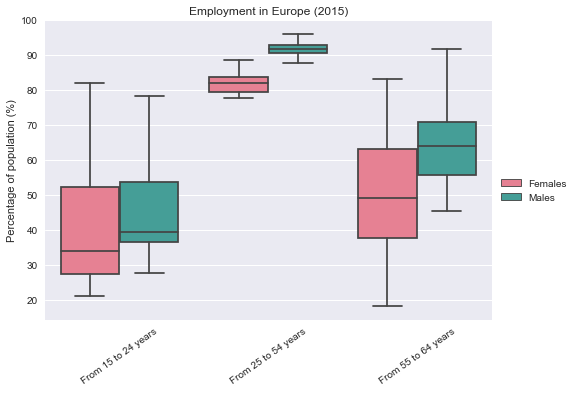

In [46]:
box = employ_f['2015'].unstack().reset_index()
#箱体图，showfliers:是否显示异常值，x="AGE"指定绘图数据
sns.boxplot(x="AGE", y=0, hue="SEX", data=box, palette=("husl"), showfliers=False)
plt.xlabel('')
plt.xticks(rotation=35)
plt.ylabel('Percentage of population (%)')
plt.title('Employment in Europe (2015)')
#bbox_to_anchor：表示legend的位置，前一个表示左右，后一个表示上下
plt.legend(bbox_to_anchor=(1,0.5))
plt.show()